## 1. **Creation of a data grid**
The first step will be (for visuation purposes) to create a n*n labeled grid. This one is going to be used to label our dataset

In [7]:
from data_generation import generate_grid

# Grid generation
grid_size = 100
grid_dict = generate_grid(grid_size, delta=0.3)

In [5]:
# Load the grid
from utility import load_grid
grid_dict = load_grid('grids/grid-2.json')
grid_size = len(grid_dict['grid'])

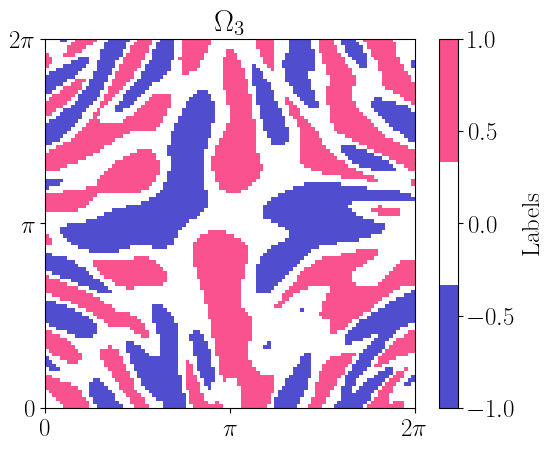

In [9]:
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from matplotlib.ticker import FuncFormatter
from utility import list_to_latex_matrix

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
matplotlib.rcParams['font.size'] = 18

# Plotting
extent = [0, 2*math.pi, 0, 2*math.pi]

cmap = matplotlib.colors.ListedColormap(['#0502ba', 'white', '#f7075f'])  # Blue for -1, Red for 1
plt.imshow(grid_dict['grid'], extent=extent, origin='lower', cmap=cmap, alpha=0.7)

def pi_formatter(x, pos):
    if x==np.pi:
        return r'$\pi$'
    if x==2*np.pi:
        return r'$2\pi$'
    return "0"
    
# Setting axis
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(pi_formatter))
ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(pi_formatter))
ax.yaxis.set_major_locator(plt.MultipleLocator(base=np.pi))

# Description of figure (matrix)
fig = plt.gcf()
l_mat = list_to_latex_matrix(grid_dict['unitary'])

plt.colorbar(label="Labels")
#plt.xlabel("$x$-axis")
#plt.ylabel("$y$-axis")
plt.title(f"$\Omega_3$")
plt.show()

In [10]:
# We now save the grid in a json file
from utility import save_grid
save_grid(grid_dict, 'grids/grid-3.json')

## 2. **Creation of a dataset**
As mentioned earlier, having a grid of labels, we can create our dataset creating random points and labeling them thanks to it.

In [98]:
# Load the grid
from utility import load_grid
grid_dict = load_grid('grids/grid-3.json')

In [99]:
# Create datasets using this grid
from utility import create_dataset
train_dataset = create_dataset(grid_dict, dataset_size=70, shuffled=True)
eval_dataset = create_dataset(grid_dict, dataset_size=30, shuffled=True)
train_dataset[:3]

[{'input': [0.967869101789941, 1.6568746635916858], 'label': 1.0},
 {'input': [2.251726206412344, 0.23020988639435194], 'label': -1.0},
 {'input': [5.198209498949794, 4.426089505333934], 'label': -1.0}]

### 2.1 **Visualize and save our dataset**

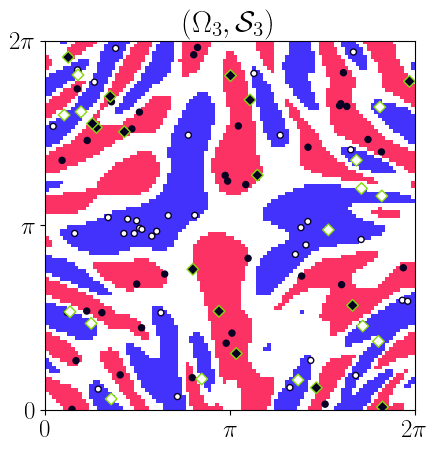

In [100]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Poins and labels
x = []
y = []
labels = []
for d in train_dataset+eval_dataset:
    x.append(d['input'][0])
    y.append(d['input'][1])
    labels.append(d['label'])

# Plotting heatmap
extent = [0, 2*math.pi, 0, 2*math.pi]
cmap = matplotlib.colors.ListedColormap(['#4332fc', 'white', '#fc3265'])  # Blue for -1, Red for 1
point_cmap = matplotlib.colors.ListedColormap(['white', 'white', '#090124'])  # White for -1, Dark blue for 1
plt.imshow(grid_dict['grid'], extent=extent, origin='lower', cmap=cmap, alpha=1.0)

# Plotting points
p_cmap = plt.cm.bwr
plt.scatter(x[:70], y[:70], c=labels[:70], cmap=point_cmap, marker='.', edgecolors='#090124', s=[75]*70)
plt.scatter(x[70:], y[70:], c=labels[70:], cmap=point_cmap, marker='D', edgecolors='#86d90b', s=[35]*30)
extent = [0, 2*math.pi, 0, 2*math.pi]

# Setting axis
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(pi_formatter))
ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(pi_formatter))
ax.yaxis.set_major_locator(plt.MultipleLocator(base=np.pi))

grid_size = grid_dict['grid_size']
#plt.colorbar(label="Labels")
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
plt.title(r"$(\Omega_3, \mathcal{S}_3)$")
plt.show()

In [101]:
# Save created dataset
from utility import save_list
save_list(train_dataset, 'datasets/train_dataset-3.json')
save_list(eval_dataset, 'datasets/eval_dataset-3.json')